

---

**In this lab enhancement, the following are done:**

1.   Definition of Clustering and its role in unsupervised learning.
2.   Application of Hierarchical Clustering using the Agglomerative Clustering Algorithm on customer data from the Mall_Customers.csv dataset.
3. Exploratory Data Analysis (EDA)
4. Visualizing the standardized data using a heatmap
5. Generating a dendrogram using hierarchical clustering with the Ward method
6. Performing hierarchical clustering with 5 clusters using Agglomerative Clustering.
Obtaining cluster labels and assigning them to the DataFrame.
7.Creating a 3D scatter plot to visualize clusters based on 'Age,' 'Spending Score (1-100),' and 'Annual Income ' using Plotly.
8. Creating a 2D scatter plot to visualize clusters based on 'Annual Income' and 'Spending Score (1-100)' using Matplotlib.
9. Calculated and interpreted  internal clustering evaluation metrics, including the Silhouette Score, Calinski and Harabasz Score, and Davies-Bouldin Score
10. Implemented Density-Based Spatial Clustering of Applications with Noise (DBSCAN) on the standardized mall data.


---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
import os

# Check if the code is running on Google Colab
try:
    from google.colab import drive
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    # Mount Google Drive
    drive.mount('/content/drive')

    # Set notebook path in Google Colab
    notebook_path = "/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING | GROUP SUBMISSIONS/2_LabEnhancements_KMeans"

    # Change the current working directory to notebook path
    os.chdir(notebook_path)

    # Print current working directory
    print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING | GROUP SUBMISSIONS/2_LabEnhancements_KMeans


# **What is clustering?**
Clustering is the task of dividing the unlabeled data or data points into different clusters such that similar data points fall in the same cluster than those which differ from the others. In simple words, the aim of the clustering process is to segregate groups with similar traits and assign them into clusters.`[(Kaushik, 2016)](https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/)





## **What is Hierarchical Clustering?** [Source](https://www.displayr.com/what-is-hierarchical-clustering/)

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

Hierarchical clustering starts by treating each observation as a separate cluster. Then, it repeatedly executes the following two steps: (1) identify the two clusters that are closest together, and (2) merge the two most similar clusters. This iterative process continues until all the clusters are merged together. This is illustrated in the diagrams below.




## Hierarchical Clustering for Customer Data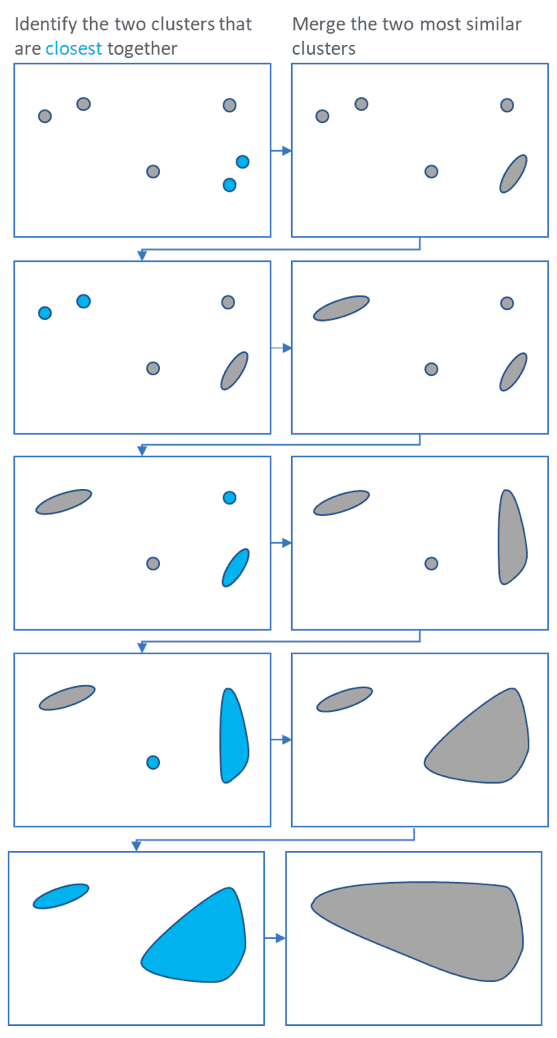



---



The main output of Hierarchical Clustering is a dendrogram, which shows the hierarchical relationship between the clusters:


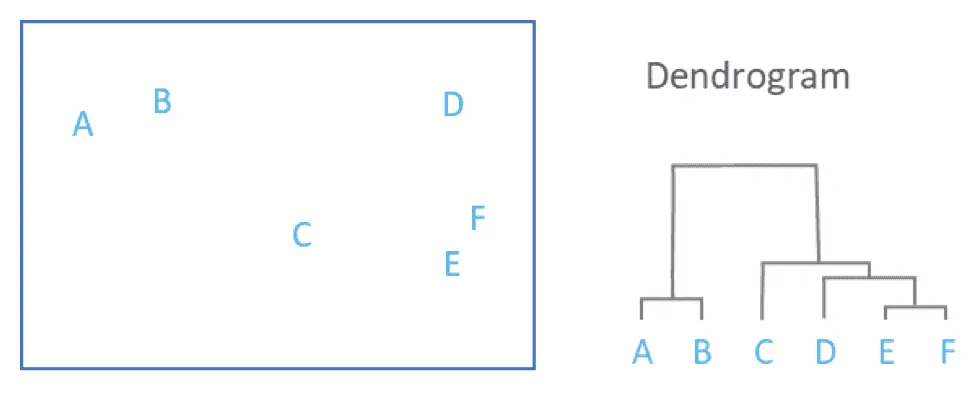


Linkage criteria for data merging strategy:
* **Ward**: Minimizes the sum of squared differences within all clusters.
* **Complete**: Minimizes the maximum distance between observations of pairs of clusters (distance between furtherst pairs of data points from 2 clusters).
* **Average**: Minimizes the average of the distances between all pairs of observations between the 2 clusters.
* **Single**: Minimizes the distance between the closest pairs of observations between 3 clusters (nearest neighbour).


## **Some key differences between k-Means and Hierarchical Clustering**:



**K-Means:**
*   It is a partitioning-based clustering algorithm. It assigns each data point to one of K clusters.
*   Requires the pre-specification of the number of clusters (K) before running the algorithm.
* Assumes that clusters are spherical and equally sized. It may struggle with non-spherical or unevenly sized clusters.
* The final clusters can vary based on the initial placement of centroids.


**Hierarchical Clustering:**
* It is an agglomerative or divisive clustering algorithm. It builds a hierarchy of clusters.
* Does not require the pre-specification of the number of clusters. The number of clusters can be determined later by cutting the dendrogram at a certain height.
* Can handle clusters of various shapes and sizes, as it does not make assumptions about cluster shapes.

*   Results are more stable and less sensitive to initial conditions.


---

# **Lab Exercises Enhancements From LAB04 KMeans**

What I have done is conducted Hierarchical Clustering using Agglomerative Clustering Algorithm on customer data in a mall using the Mall_Customers.csv **dataset from Lab04**

In [ ]:
#Loaded the dataset Mall_Customers.csv into a DataFrame named df1.
df1 = pd.read_csv('Mall_Customers.csv')
df1.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#Check missing values and There is no missing values
df1.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#Renamed the 'Genre' column to 'Gender'
df1.rename(columns={'Genre': 'Gender'}, inplace=True)

In [ ]:
#Checked the summary statistics of the dataset
df1.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Statistics observations from the dataset**

*   The dataset consists of 200 observations, and there are no missing values in any of the variables (CustomerID, Age, Annual Income, Spending Score).

*   The age of customers in the dataset ranges from 18 to 70.

* The average (mean) age is around 38.85, and the distribution has a standard deviation of approximately 13.97, suggesting a moderate spread around the mean.

* The average (mean) annual income is approximately 60,560, with a standard deviation of about 26,264, indicating significant income variability among customers

* The mean spending score is 50.20, with a standard deviation of 25.82, indicating a moderate level of variability in spending behavior among customers.




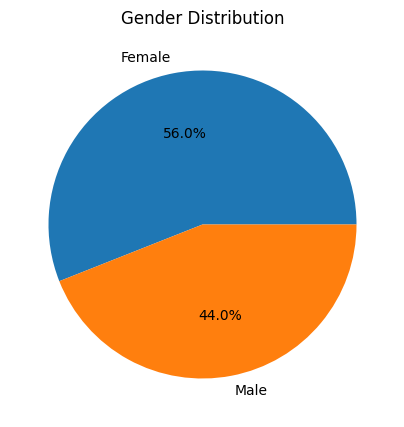

In [ ]:
# Count the occurrences of each gender
gender_counts = df1['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

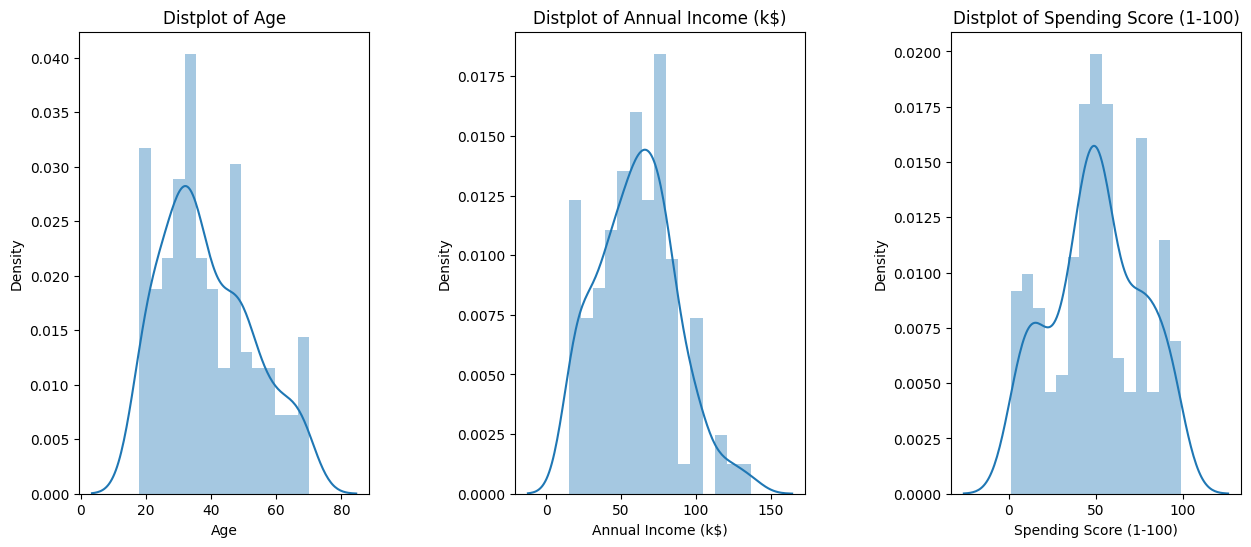

In [ ]:
#Distribution plots for 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)'
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df1[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

Age feature appears to be a little right skewed.

In [ ]:
#Encoded the 'Gender' column using Label Encoding
label_encoder = preprocessing.LabelEncoder()

df1['Gender'] = label_encoder.fit_transform(df1['Gender'])
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


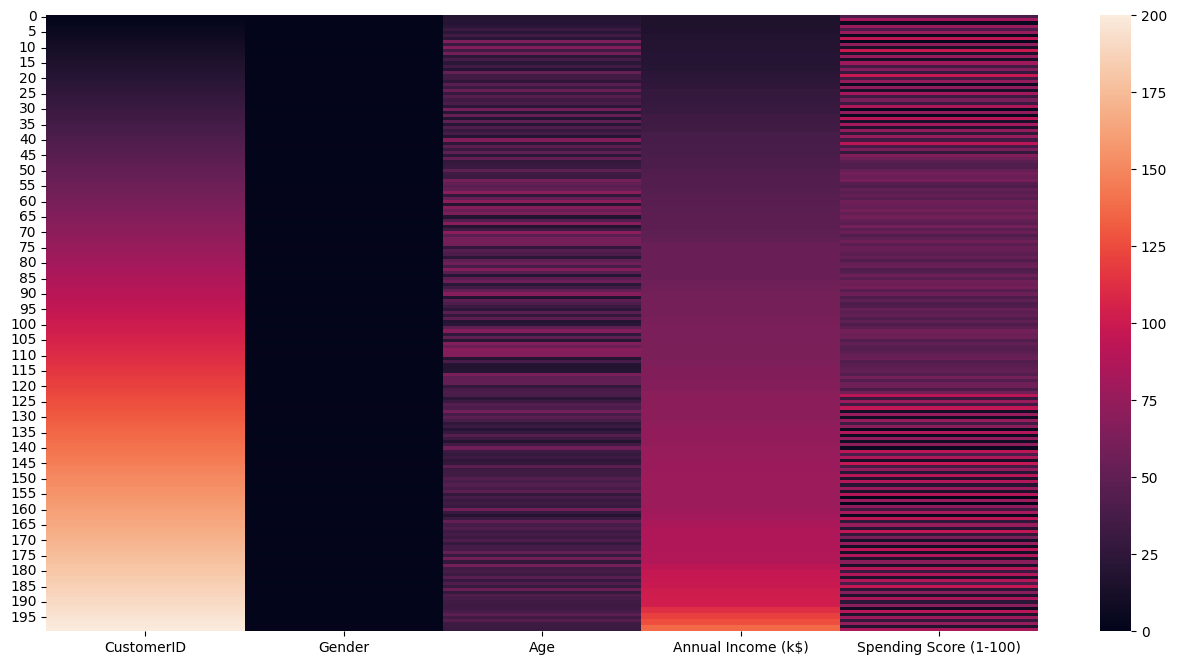

In [ ]:
#heatmap to visualize the standardized data.
plt.figure(1, figsize = (16 ,8))
sns.heatmap(df1)
plt.show()

**A dendrogram** is a diagram representing a tree. This diagrammatic representation is frequently used in different contexts: in hierarchical clustering, it illustrates the arrangement of the clusters produced by the corresponding analyses.

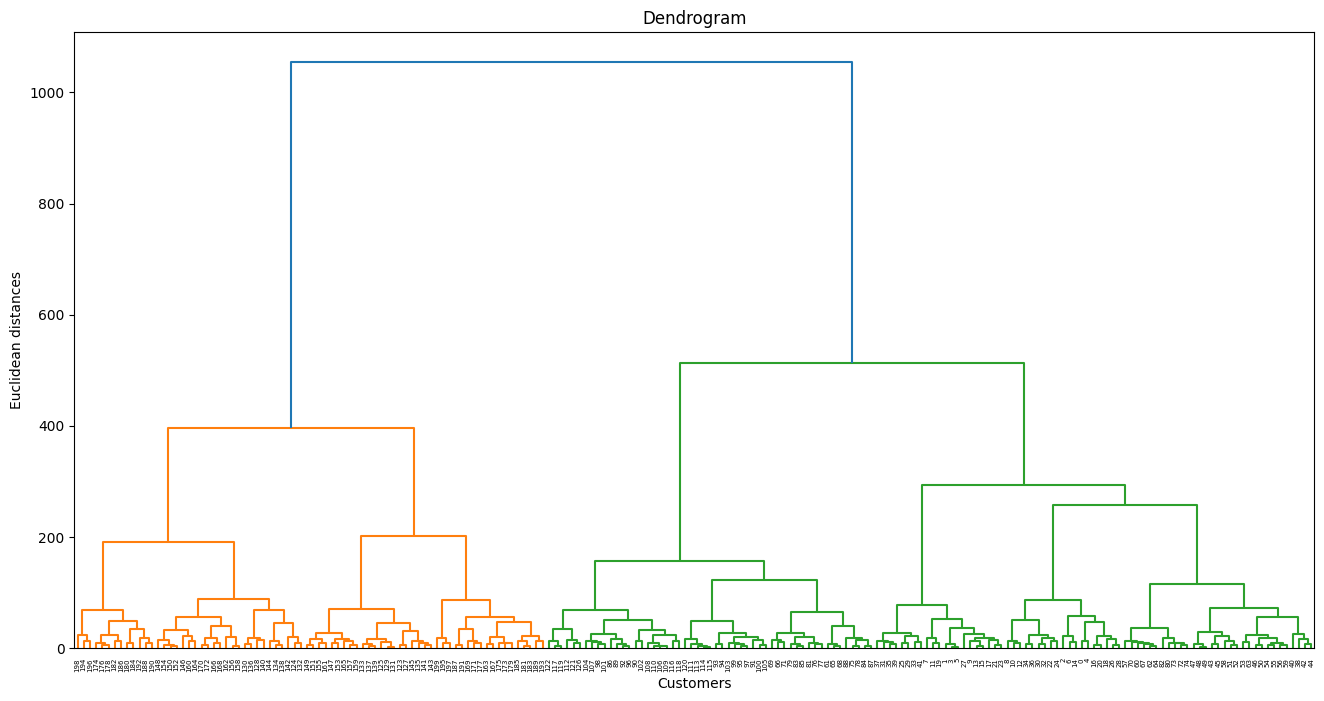

In [ ]:
#Generating a dendrogram using hierarchical clustering with the Ward method
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(df1, method  = "ward"))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

The dendrogram above shows the hierarchical clusters created using complete linkage, which joins pairs of clusters together that have the smallest maximum distance between their observations. The height at which the branches split indicates the distance between the clusters. Clusters that are more similar to each other are joined early on in the tree and become less and less similar as we move up the tree. To identify the number of clusters, we can make a horizontal cut across the dendrogram. hence we can conclude that the number of clusters we can have as 5.

**Agglomerative Clustering**
This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

In [ ]:
#hierarchical clustering with 5 clusters using Agglomerative Clustering and obtaining cluster labels
hierarchicalclustering = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='average')

y_hierarchicalclustering = hierarchicalclustering.fit_predict(df1)
y_hierarchicalclustering

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [ ]:
#Adding the cluster labels to the DataFrame df1
df1['cluster'] = pd.DataFrame(y_hierarchicalclustering)

In [ ]:
#3D scatter plot to visualize clusters based on 'Age', 'Spending Score (1-100)', and 'Annual Income (k$)'.
trace_custom = go.Scatter3d(
    x= df1['Age'],
    y= df1['Spending Score (1-100)'],
    z= df1['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df1['cluster'],
        size= 10,
        line=dict(
            color= df1['cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data_custom = [trace_custom]
layout_custom = go.Layout(
    title= 'Clusters using Agglomerative Clustering',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data_custom, layout=layout_custom)
py.offline.iplot(fig)

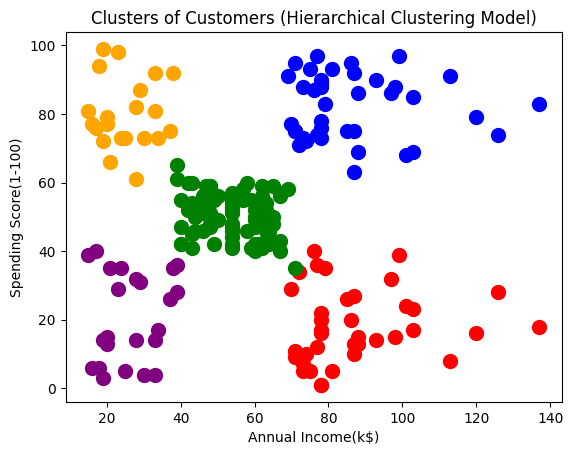

In [ ]:
#scatter plot to visualize clusters based on 'Annual Income(k$)' and 'Spending Score(1-100)'.
X = df1.iloc[:, [3,4]].values
plt.scatter(X[y_hierarchicalclustering==0, 0], X[y_hierarchicalclustering==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hierarchicalclustering==1, 0], X[y_hierarchicalclustering==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hierarchicalclustering==2, 0], X[y_hierarchicalclustering==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hierarchicalclustering==3, 0], X[y_hierarchicalclustering==3, 1], s=100, c='purple', label ='Cluster 4')
plt.scatter(X[y_hierarchicalclustering==4, 0], X[y_hierarchicalclustering==4, 1], s=100, c='orange', label ='Cluster 5')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

### **Cluster Analysis**
Green - Low Income, Low Spending\
Yellow - Low Income, High Spending\
Red - Medium Income, Medium Spending\
Purple - High Income, Low Spending\
Blue - High Income, High Spending

In [ ]:
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,3
1,2,1,21,15,81,4
2,3,0,20,16,6,3
3,4,0,23,16,77,4
4,5,0,31,17,40,3


## Internal Measures
Internal measures for clustering are unsupervised appraoches to evaluate clustering quality. These methods mostly capitalizes on the distance between samples within the clusters, and also the distances across different clusters.



### Silhouette Coefficient

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

- 1: clusters are well apart from each other and clearly distinguished.
- 0: clusters are indifferent, or we can say that the distance between clusters is not significant.
- -1: clusters are assigned in the wrong way as a different cluster is closer.


$S(i) = \frac{b(i)-a(i)}{max(a(i),b(i))}$

- a(i) = the average distance between a point i to its neighbouring points within a cluster.
- b(i) = the average distance from point i to all points in the nearest cluster.

Therefore, every point in the dataset has a silhouette coefficient, and averaging the coefficients will give you the final silhouette score.


In [ ]:
from sklearn.metrics import silhouette_score

# Assuming df1 is your DataFrame with cluster labels
silhouette_avg = silhouette_score(df1, df1['cluster'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.4439830805835354


- The Silhouette Score measures how well-separated the clusters are.
- A value of 0.44 indicates moderate separation between clusters.
- Values closer to 1 suggest well-defined, distinct clusters, while values near 0 suggest overlapping clusters.

###  Calinski and Harabasz Score

Also known as the Variance Ratio Criterion, this score is defined as ratio of the sum of between-cluster dispersion and of within-cluster dispersion. (Similar to BetaCV but inverted)

In [ ]:
from sklearn.metrics import calinski_harabasz_score

# Assuming df1 is your DataFrame with cluster labels
calinski_harabasz = calinski_harabasz_score(df1, df1['cluster'])
print(f"Calinski and Harabasz Score: {calinski_harabasz}")


Calinski and Harabasz Score: 243.53018418196606


- The Calinski and Harabasz Score evaluates the ratio of between-cluster dispersion to within-cluster dispersion.
- A higher score (243.53) suggests that the clusters are well-separated.
- Larger values indicate better clustering with clear separation between clusters.

### Davies-Bouldin Score

The score is defined as the average similarity measure of each cluster with its most similar cluster. The similarity is the ratio of within-cluster distances to between-cluster distances, so the clusters which are farther apart and less dispersed will result in a better score. The minimum score is zero, with lower values indicating better clustering.

In [ ]:
from sklearn.metrics import davies_bouldin_score

# Assuming df1 is your DataFrame with cluster labels
davies_bouldin = davies_bouldin_score(df1, df1['cluster'])
print(f"Davies-Bouldin Score: {davies_bouldin}")


Davies-Bouldin Score: 0.7409788020186513


- The Davies-Bouldin Score measures the average similarity of each cluster with its most similar cluster.
- A score of 0.74 suggests moderate similarity between clusters.
- Lower values indicate better clustering, with 0 being the best possible score.



## DBSCAN

Density-Based Spatial Clustering of Applications with Noise is a method that finds core samples of high density and expands clusters from them. This method is generally good for data which contains clusters of similar density. The worst case memory complexity of DBSCAN is $O(n^2)$, which can occur when the `eps` parameter is large and `min_samples` is low.

Let's implement DBSCAN below:

[ 1  0 -1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0
  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0 -1  0  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  2  3  2  1  2  3  2  3  2  3  2  3  2  3  2  3  2  3  2  3  2
  3  2  3  2  3  2  3  2  3  2  3  2  3  2  3  2  3  2  3  2  3  2  3  2
  3  2  3  2  3  2  3  2  3  2  3  2  3  2  3  2  3  2  3  2  3  2  3  2
  3  2  3  2 -1  2 -1  2]


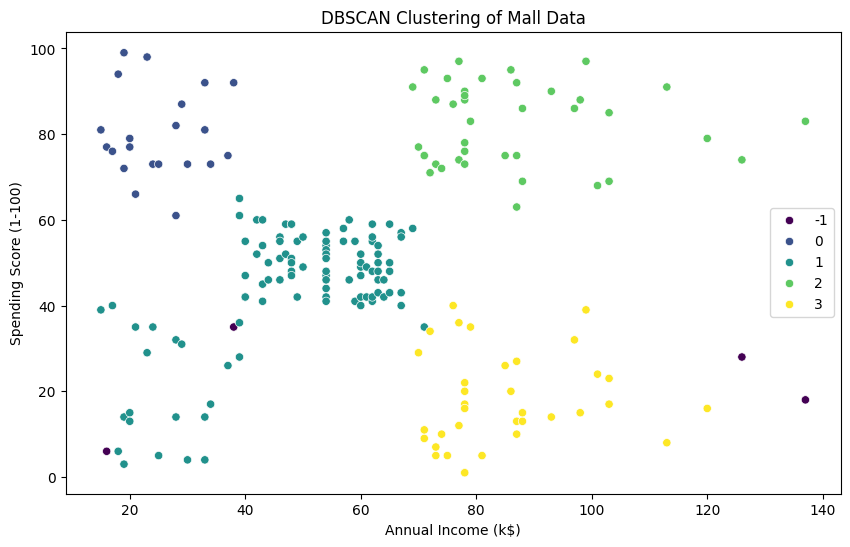

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-numeric columns if any
mall_data_numeric = df1.drop(['CustomerID', 'Gender'], axis=1)

# Standardize the data
scaler = StandardScaler()
mall_data_standardized = scaler.fit_transform(mall_data_numeric)

# Apply DBSCAN with your chosen values for eps and min_samples
dbscan = DBSCAN(eps=0.9, min_samples=5)
clusters = dbscan.fit_predict(mall_data_standardized)
print(clusters)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue=clusters, palette='viridis', data=df1)
plt.title('DBSCAN Clustering of Mall Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


-1 indicate outlier/noise points, and the others are the clusters.

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette_avg = silhouette_score(mall_data_standardized, clusters)
calinski_harabasz = calinski_harabasz_score(mall_data_standardized, clusters)
davies_bouldin = davies_bouldin_score(mall_data_standardized, clusters)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski and Harabasz Score: {calinski_harabasz}")
print(f"Davies-Bouldin Score: {davies_bouldin}")


Silhouette Score: 0.41803663765756255
Calinski and Harabasz Score: 83.10338128468187
Davies-Bouldin Score: 2.070663169826703


Overall, these metrics provide insights into the quality of the clustering results. A Silhouette Score of 0.418 suggests moderate separation between clusters, and a Calinski and Harabasz Score of 83.10 indicates well-separated clusters. The Davies-Bouldin Score of 2.07 suggests moderate similarity between clusters.

Conclusion:
Same number of clusters were identified in both KMeans and Hierarchial Clustering techniques.
Simple dataset with very less noise (our dataset has only 200 records with 4 features)
Small size and low density of differences of clusters


**References**



1.   https://www.displayr.com/what-is-hierarchical-clustering/
2.   https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/
3. https://medium.com/analytics-vidhya/creating-a-3d-scatter-plot-from-your-clustered-data-with-plotly-843c20b78799
4. https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c
5. https://medium.com/@haataa/how-to-measure-clustering-performances-when-there-are-no-ground-truth-db027e9a871c
6. https://www.kdnuggets.com/2023/04/exploring-unsupervised-learning-metrics.html
7. https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/


# END.